## Подготовка данных

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

In [2]:
df = pd.read_csv("https://storage.yandexcloud.net/auth-def-2024/datasets/meta_table_with_texts.csv")

In [3]:
df

,Unnamed: 0,author,title,year,annotation,genres,text
0,0,Пушкин Александр Сергеевич,"""Сраженный рыцарь"". Пушкина",1875,NaN,"['Стихотворение', 'Поэзия', 'Дополнительные ма...","\n \nЛитературный альбомъ.\n""Сраженный рыцар..."
1,1,Карамзин Николай Михайлович,О достоинстве древних и новых,1802,NaN,"['Очерк', 'Переводы', 'Публицистика', 'Переводы']",\nО достоинстве древних и новых\n(Перевод с не...
2,2,Гоголь Николай Васильевич,Переписка (1848-1852),1852,Пропущено два разворота.,"['Переписка', 'Эпистолярий', 'Переписка']",\n Гоголь Н. В. Полное собрание сочинений и ...
3,3,Мамин-Сибиряк Дмитрий Наркисович,Злой дух,1898,NaN,"['Рассказ', 'Проза', 'Повести и рассказы разны...",\n \nД. МАМИНЪ-СИБИРЯКЪПОЛНОЕ СОБРАНІЕ СОЧИН...
4,4,Мамин-Сибиряк Дмитрий Наркисович,Нимфа,1908,NaN,"['Рассказ', 'Проза', 'Повести и рассказы разны...",\nДмитрий Мамин-Сибиряк\nНимфа\nI.\n Щегольс...
...,...,...,...,...,...,...,...
2560,2560,Достоевский Федор Михайлович,Историко-критический комментарий к сочинениям ...,1885,NaN,"['Статья', 'Критика', 'О творчестве автора']",\n Историко-критическій комментарій къ сочин...
2561,2561,Куприн Александр Иванович,Звезда Соломона,1917,NaN,"['Повесть', 'Проза', 'Повести и романы']",\nАлександр Иванович Куприн Звезда Соломона\nI...
2562,2562,Бунин Иван Алексеевич,На край света,1894,NaN,"['Рассказ', 'Проза', 'Рассказы (1892-1909)']",\n Иван Алексеевич Бунин\nНА КРАЙ СВЕТА\n ...
2563,2563,Салтыков-Щедрин Михаил Евграфович,Внучка панцирного боярина,1868,Роман из времен последнего польского мятежа И....,"['Статья', 'Критика', 'Критика, публицистика, ...",\nМ.Е. Салтыков-Щедрин\nВнучка панцирного бояр...


In [4]:
# Пример данных
texts = df['text']
authors = df['author']

In [5]:
# Преобразование текстов в численное представление с помощью CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=500)  # Учитываем униграммы и биграммы
X = vectorizer.fit_transform(texts)
y = authors

In [6]:
print(X.shape)

(2565, 500)


> Для данных X CountVectorizer сделал 500 features (500 колонок)

In [7]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение трех разных моделей и их метрики (baseline)

In [8]:
model_SVC = SVC(kernel='linear', random_state=42)
model_logreg = LogisticRegression(random_state=42, max_iter=1000)
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

model_SVC.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
# Предсказания
y_pred_SVC = model_SVC.predict(X_test)
y_pred_logreg = model_logreg.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

#### Примеры предсказанных значений

In [11]:
y_pred_SVC[0]

'Мамин-Сибиряк Дмитрий Наркисович'

In [12]:
y_pred_logreg[0]

'Мамин-Сибиряк Дмитрий Наркисович'

In [13]:
y_pred_dt[0]

'Мамин-Сибиряк Дмитрий Наркисович'

#### Метрики качества:

##### SVC

In [15]:
# Оценка качества модели
# Accuracy
accuracy = accuracy_score(y_test, y_pred_SVC)
print("Accuracy:", accuracy)

# Precision, Recall, F1 (взвешенные для многоклассовой задачи)
precision = precision_score(y_test, y_pred_SVC, average='weighted')
recall = recall_score(y_test, y_pred_SVC, average='weighted')
f1 = f1_score(y_test, y_pred_SVC, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7543859649122807
Precision: 0.7715431525429459
Recall: 0.7543859649122807
F1 Score: 0.756865941742538
Confusion Matrix:
 [[13  3  0  0  1  1  1  0  0  0  1  0  1]
 [ 1 40  0  0  1  2  3  0  1  1  0  1  0]
 [ 7  2 20  1  0  1  2  1  0  0  2  1  1]
 [ 0  1  0 33  0  2  5  0  1  0  3  0  0]
 [ 1  1  0  0  5  1  3  0  0  1  0  0  1]
 [ 1  1  1  1  2 47  1  0  3  2  0  0  0]
 [ 2  4  0  0  2  1 65  1  1  0  0  0  2]
 [ 1  1  0  0  0  0  1  3  1  0  0  0  0]
 [ 0  1  0  1  0  0  3  0 47  0  1  0  0]
 [ 2  0  0  0  2  2  2  2  0 18  0  0  0]
 [ 1  0  1  2  1  1  2  0  0  0 27  1  0]
 [ 3  1  1  1  0  2  0  1  1  0  0 51  0]
 [ 0  2  0  0  0  1  1  0  0  1  1  0 18]]


In [16]:
# Полный отчет
print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVC))


Classification Report:
                                   precision    recall  f1-score   support

     Блок Александр Александрович       0.41      0.62      0.49        21
            Бунин Иван Алексеевич       0.70      0.80      0.75        50
        Гоголь Николай Васильевич       0.87      0.53      0.66        38
     Достоевский Федор Михайлович       0.85      0.73      0.79        45
      Есенин Сергей Александрович       0.36      0.38      0.37        13
      Карамзин Николай Михайлович       0.77      0.80      0.78        59
        Куприн Александр Иванович       0.73      0.83      0.78        78
         Лермонтов Михаил Юрьевич       0.38      0.43      0.40         7
 Мамин-Сибиряк Дмитрий Наркисович       0.85      0.89      0.87        53
       Пушкин Александр Сергеевич       0.78      0.64      0.71        28
Салтыков-Щедрин Михаил Евграфович       0.77      0.75      0.76        36
          Тургенев Иван Сергеевич       0.94      0.84      0.89        61


##### LogisticRegression

In [17]:
# Оценка качества модели
# Accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy)

# Precision, Recall, F1 (взвешенные для многоклассовой задачи)
precision = precision_score(y_test, y_pred_logreg, average='weighted')
recall = recall_score(y_test, y_pred_logreg, average='weighted')
f1 = f1_score(y_test, y_pred_logreg, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8206627680311891
Precision: 0.8312367727266581
Recall: 0.8206627680311891
F1 Score: 0.8234954763248455
Confusion Matrix:
 [[12  4  0  0  1  1  2  0  1  0  0  0  0]
 [ 0 39  0  0  1  0  6  1  1  1  0  0  1]
 [ 2  1 32  0  0  1  0  2  0  0  0  0  0]
 [ 0  0  0 36  0  1  2  1  1  0  3  1  0]
 [ 0  1  0  0  8  0  3  0  0  0  0  0  1]
 [ 1  1  0  1  0 50  2  1  0  1  0  1  1]
 [ 1  2  2  0  1  0 69  1  0  1  0  0  1]
 [ 1  0  0  0  0  0  1  4  0  0  1  0  0]
 [ 0  1  0  1  0  0  3  0 47  0  1  0  0]
 [ 0  0  0  0  2  0  2  2  0 22  0  0  0]
 [ 0  0  1  2  0  0  2  0  0  0 30  1  0]
 [ 2  1  1  0  0  1  0  0  0  0  1 55  0]
 [ 0  3  1  0  0  0  2  0  0  1  0  0 17]]


In [18]:
# Полный отчет
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
                                   precision    recall  f1-score   support

     Блок Александр Александрович       0.63      0.57      0.60        21
            Бунин Иван Алексеевич       0.74      0.78      0.76        50
        Гоголь Николай Васильевич       0.86      0.84      0.85        38
     Достоевский Федор Михайлович       0.90      0.80      0.85        45
      Есенин Сергей Александрович       0.62      0.62      0.62        13
      Карамзин Николай Михайлович       0.93      0.85      0.88        59
        Куприн Александр Иванович       0.73      0.88      0.80        78
         Лермонтов Михаил Юрьевич       0.33      0.57      0.42         7
 Мамин-Сибиряк Дмитрий Наркисович       0.94      0.89      0.91        53
       Пушкин Александр Сергеевич       0.85      0.79      0.81        28
Салтыков-Щедрин Михаил Евграфович       0.83      0.83      0.83        36
          Тургенев Иван Сергеевич       0.95      0.90      0.92        61


##### DecisionTreeClassifier

In [19]:
# Оценка качества модели
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Precision, Recall, F1 (взвешенные для многоклассовой задачи)
precision = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.47953216374269003
Precision: 0.4981477840954939
Recall: 0.47953216374269003
F1 Score: 0.4073556949280588
Confusion Matrix:
 [[ 0  0  0  2  0  0 18  0  0  0  0  0  1]
 [ 0  1  1  0  0  0 45  0  1  0  0  0  2]
 [ 0  0 33  0  0  0  4  0  1  0  0  0  0]
 [ 0  0  1 37  0  1  4  0  1  0  0  1  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  1]
 [ 0  1  0  0  0  0 56  0  1  0  0  1  0]
 [ 0  0  1  0  0  0 75  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 19  0 32  0  0  0  1]
 [ 0  0  3  0  0  0 24  0  0  1  0  0  0]
 [ 0  0  1  6  0  0 23  0  0  0  0  6  0]
 [ 0  0  3  0  0  0 11  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0 20]]


In [20]:
# Полный отчет
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))


Classification Report:
                                   precision    recall  f1-score   support

     Блок Александр Александрович       0.00      0.00      0.00        21
            Бунин Иван Алексеевич       0.50      0.02      0.04        50
        Гоголь Николай Васильевич       0.77      0.87      0.81        38
     Достоевский Федор Михайлович       0.82      0.82      0.82        45
      Есенин Сергей Александрович       0.00      0.00      0.00        13
      Карамзин Николай Михайлович       0.00      0.00      0.00        59
        Куприн Александр Иванович       0.25      0.96      0.39        78
         Лермонтов Михаил Юрьевич       0.00      0.00      0.00         7
 Мамин-Сибиряк Дмитрий Наркисович       0.89      0.60      0.72        53
       Пушкин Александр Сергеевич       1.00      0.04      0.07        28
Салтыков-Щедрин Михаил Евграфович       0.00      0.00      0.00        36
          Тургенев Иван Сергеевич       0.85      0.77      0.81        61


### Сводка по метрикам качества

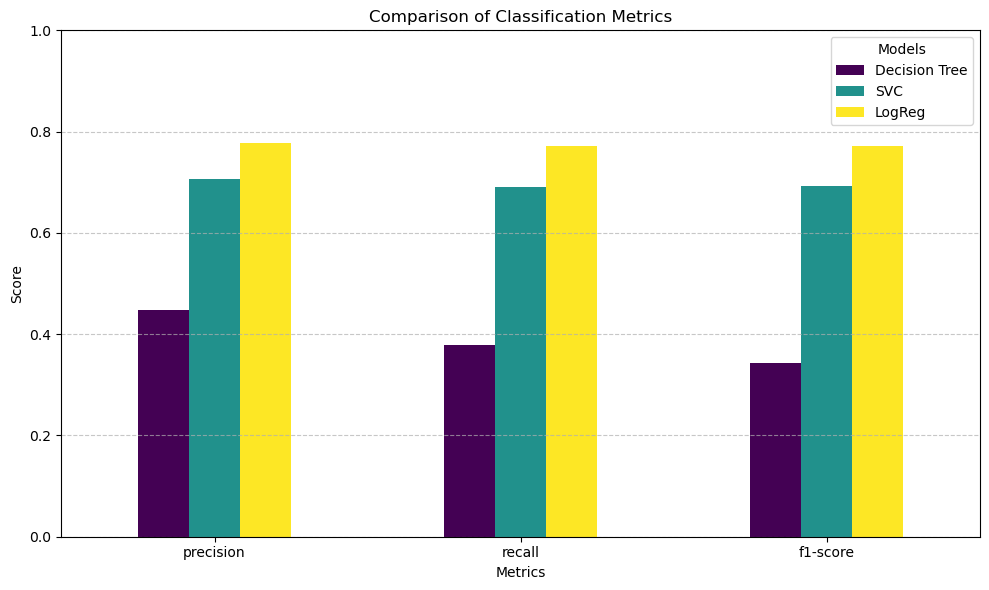

In [22]:
import matplotlib.pyplot as plt

report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
report_svc = classification_report(y_test, y_pred_SVC, output_dict=True, zero_division=0)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True, zero_division=0)

# Выбираем метрики для визуализации
metrics = ['precision', 'recall', 'f1-score']
labels = ['Decision Tree', 'SVC', 'LogReg']

# Извлечение метрик
data = {
    'Decision Tree': [report_dt['macro avg'][metric] for metric in metrics],
    'SVC': [report_svc['macro avg'][metric] for metric in metrics],
    'LogReg': [report_logreg['macro avg'][metric] for metric in metrics]
}

# Создание DataFrame для удобства работы
df = pd.DataFrame(data, index=metrics)

# Построение гистограммы
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()